In [1]:
suppressMessages({
    library(Gviz)
    library(GenomicRanges)
    library(GenomicFeatures)
    library(rtracklayer)
    library(repr)
    library(dplyr)
    library(AnnotationHub)
})
options(ucscChromosomeNames=FALSE)
source("/home/wangrr/Analysis/epiRNA/src/epiRNA/Rscript/gviz_utils.R")
setwd("/data/wangrr/Analysis/epiRNA/workdir2/benchmark")

Warning message:
“package ‘Gviz’ was built under R version 4.4.2”
Warning message:
“package ‘S4Vectors’ was built under R version 4.4.2”
Warning message:
“package ‘BiocGenerics’ was built under R version 4.4.2”


Warning message:
“package ‘IRanges’ was built under R version 4.4.2”
Warning message:
“package ‘GenomicRanges’ was built under R version 4.4.2”
Warning message:
“package ‘GenomeInfoDb’ was built under R version 4.4.2”
Warning message:
"package 'GenomicFeatures' was built under R version 4.4.2"
Warning message:
"package 'AnnotationDbi' was built under R version 4.4.2"
Warning message:
"package 'Biobase' was built under R version 4.4.2"
Warning message:
"package 'rtracklayer' was built under R version 4.4.3"
Warning message:
"package 'BiocFileCache' was built under R version 4.4.2"


In [2]:
ref_dir <- "/data/wangrr/Analysis/epiRNA/Dataset/Reference"
data_dir <- "/data/wangrr/Analysis/epiRNA/Dataset/processed/4-coverage/m6A"
peak_dir <- "/data/wangrr/Analysis/epiRNA/Dataset/processed/5-peakcall/m6A"
human_gtf_file <- file.path(ref_dir, "Homo_sapiens.GRCh38.84.gtf")
mouse_gtf_file <- file.path(ref_dir, "Mus_musculus.GRCm38.84.gtf")

human_gtf <- load_gtf(human_gtf_file)
mouse_gtf <- load_gtf(mouse_gtf_file)

In [3]:
chrom <- "4"
start <- 56889092 + 1
end <- start + 65536
genome <- "hg38"

genes <- extract_genes_from_gtf(gtf=human_gtf, chrom=chrom, start=start, end=end)
geneModels <- get_geneModels(genes, protein_coding_only = TRUE)
grtrack <- get_grtrack(geneModels, chrom=chrom, start=start, end=end, collapseTranscripts="longest", shape="arrow")

min(geneModels$start) - max(geneModels$end)

  Found 63 genes in region


[1] -27968

In [4]:
axis_track <- GenomeAxisTrack(
    name = "",
    add53 = TRUE,
    add35 = TRUE,
    labelPos = "alternating",
    cex = 1
)

In [5]:
gene <- "REST"
pred_dir <- "./predicted_bigwig"

brain_samples <- c("Cerebellum-1", "Cerebrum-1")
nonbrain_samples <- c("Lung-1", "Spleen-1")
track_colors <- c("#4a3eb0", "#4a3eb0", "#b92b27", "#b92b27")
pred_tracks <- c()
i <- 1
for (s in c(brain_samples, nonbrain_samples)) {
    track_title <- "m6A-seq \npredicted"
    bwfile <- file.path(pred_dir, paste0(s, "_", gene, "_fullmodel.bigwig"))
    track <- get_bwtrack(
        bwfile, chrom, start, end, track_color=track_colors[i],
        log_transform=FALSE, panel_title=track_title,
        ylim=c(0,5),
        yTicksAt=c(0,5)
    )
    pred_tracks <- c(pred_tracks, track)
    i <- i + 1
}

In [6]:
length(pred_tracks)

[1] 4

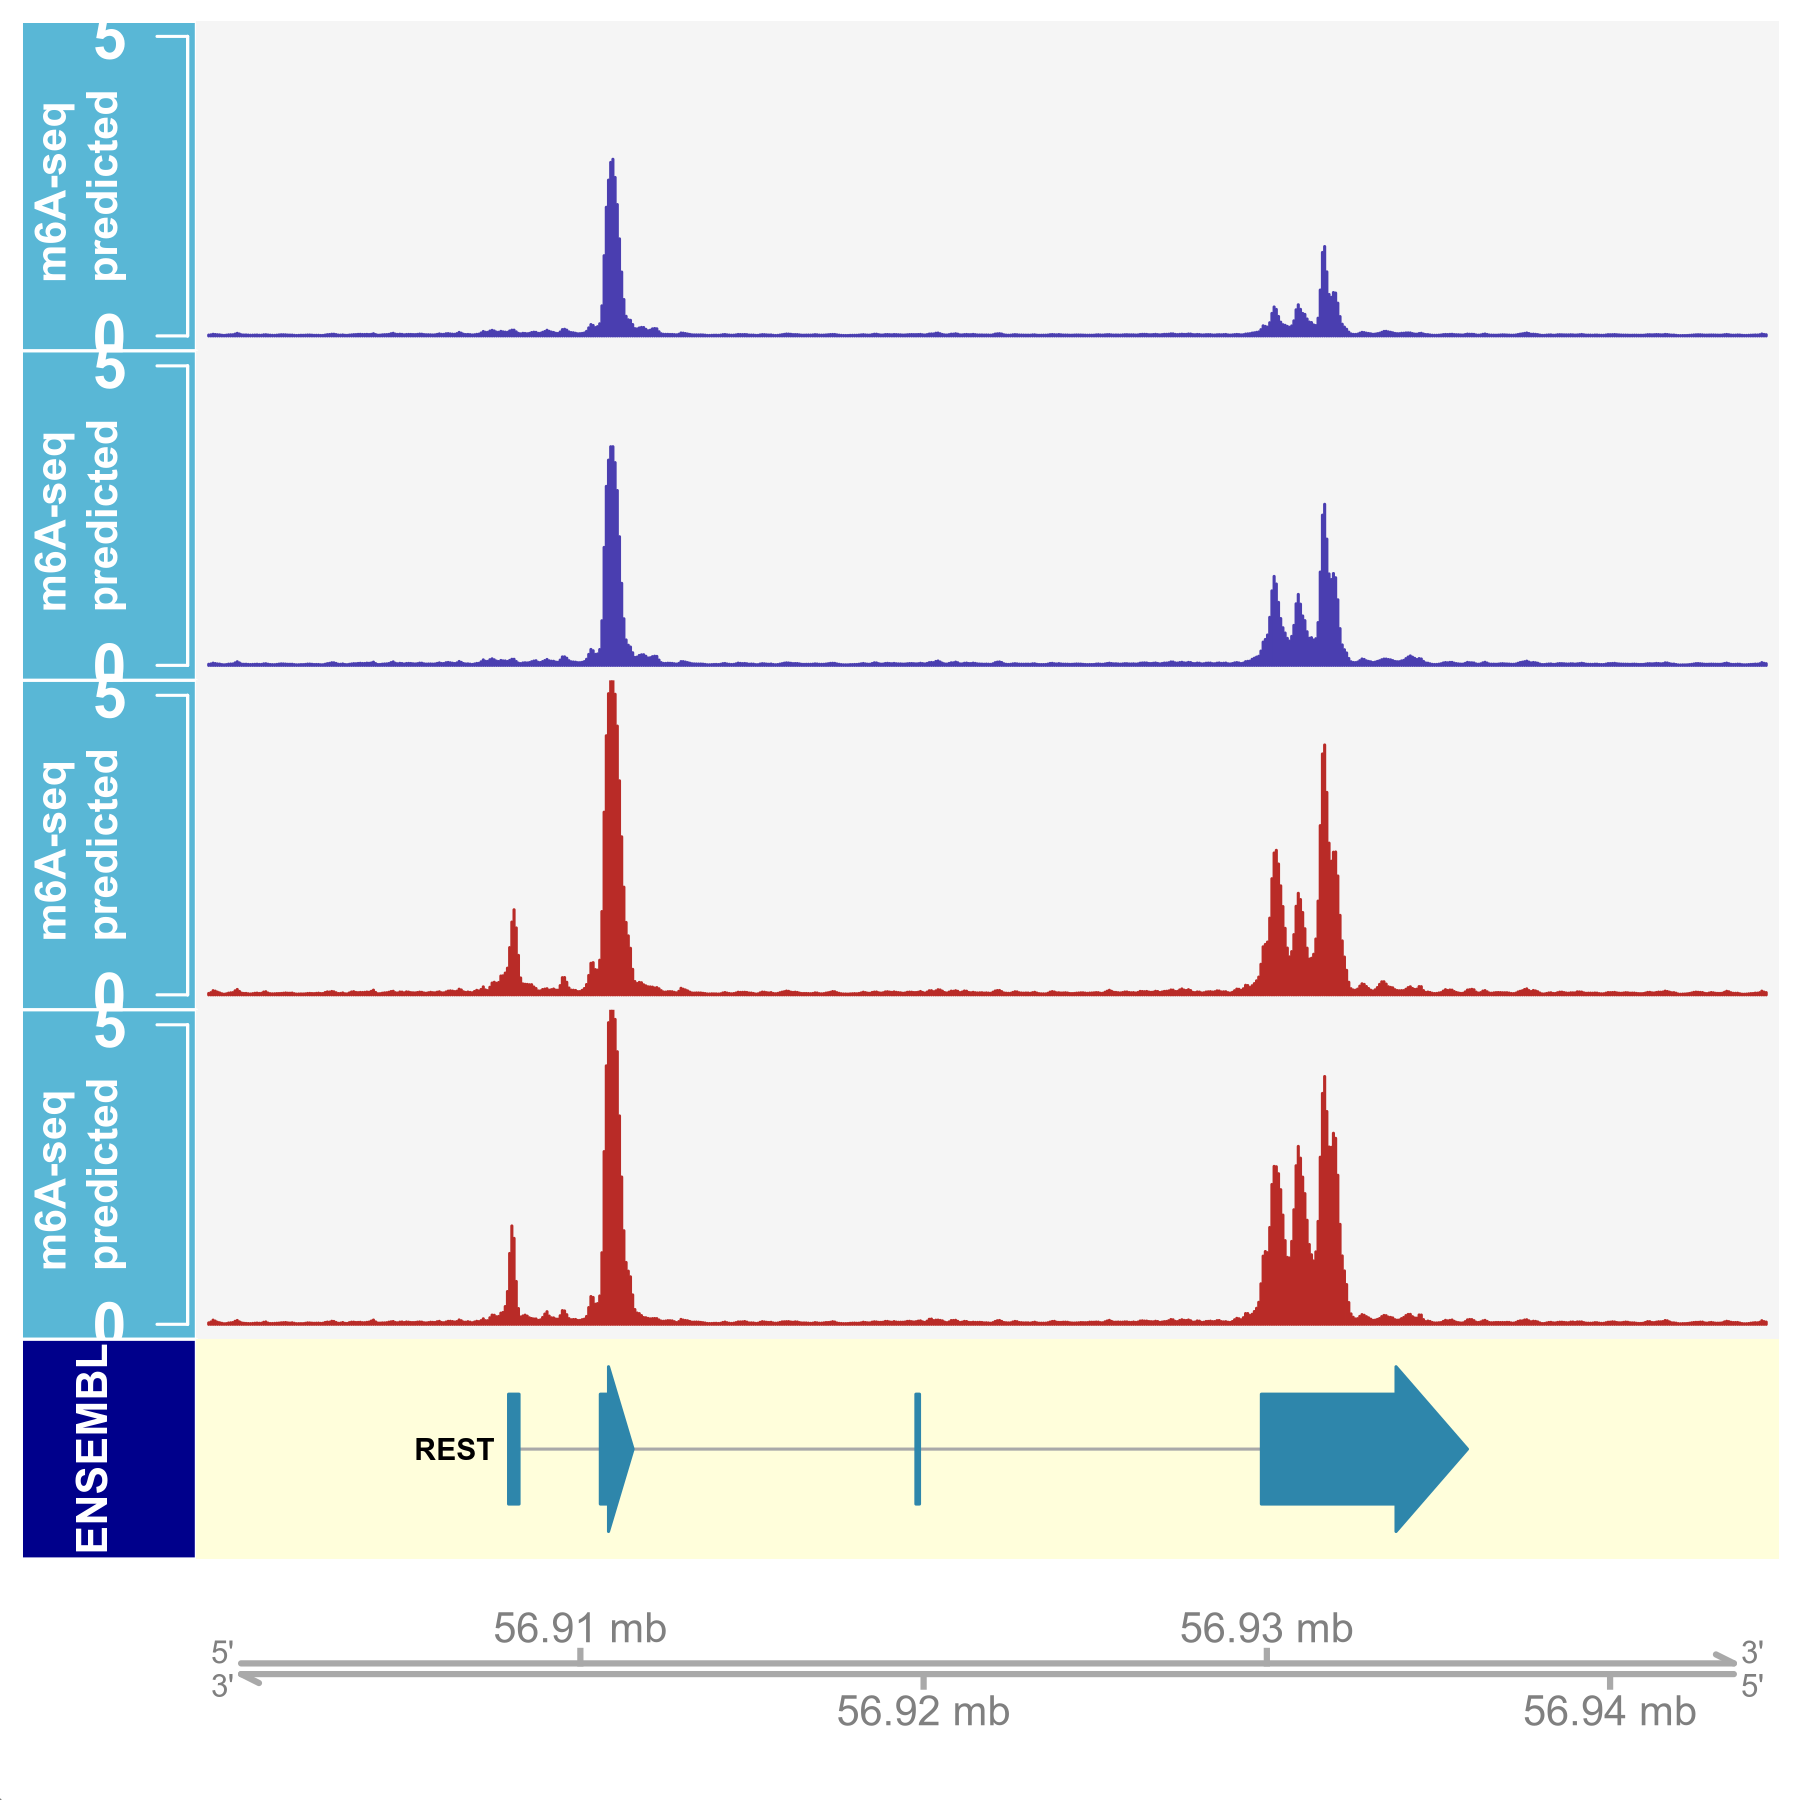

In [7]:
options(repr.plot.width=6, repr.plot.height=6, repr.plot.res = 300)
zoom <- 20000

full_tracks <- c(pred_tracks, grtrack, axis_track)
sizes <- rep(x=0.15, times=length(pred_tracks))
sizes <- c(sizes,  0.1, 0.1)
plotTracks(
    full_tracks,
    sizes = sizes,
    from = start + zoom / 2,
    to = end - zoom / 2,
    main = "",
    cex.main = 1.5,
    fontface.main = 2,
    window = -1,
    windowSize = 100
)

In [10]:
gene <- "REST"
pred_dir <- "./predicted_bigwig"

brain_samples <- c("Cerebellum-1", "Cerebrum-1")
nonbrain_samples <- c("Lung-1", "Spleen-1")
track_colors <- c("#3e79b0", "#3e79b0", "#e87446", "#e87446")
obs_tracks <- c()
i <- 1
for (s in c(brain_samples, nonbrain_samples)) {
    track_title <- "RNA-seq \nobserved"
    bwfile <- file.path(data_dir, "Input", paste0(s, ".bigwig"))
    track <- get_bwtrack(
        bwfile, chrom, start, end, track_color=track_colors[i],
        log_transform=TRUE, panel_title=track_title,
        ylim=c(0,5),
        yTicksAt=c(0,5)
    )
    obs_tracks <- c(obs_tracks, track)
    i <- i + 1
}

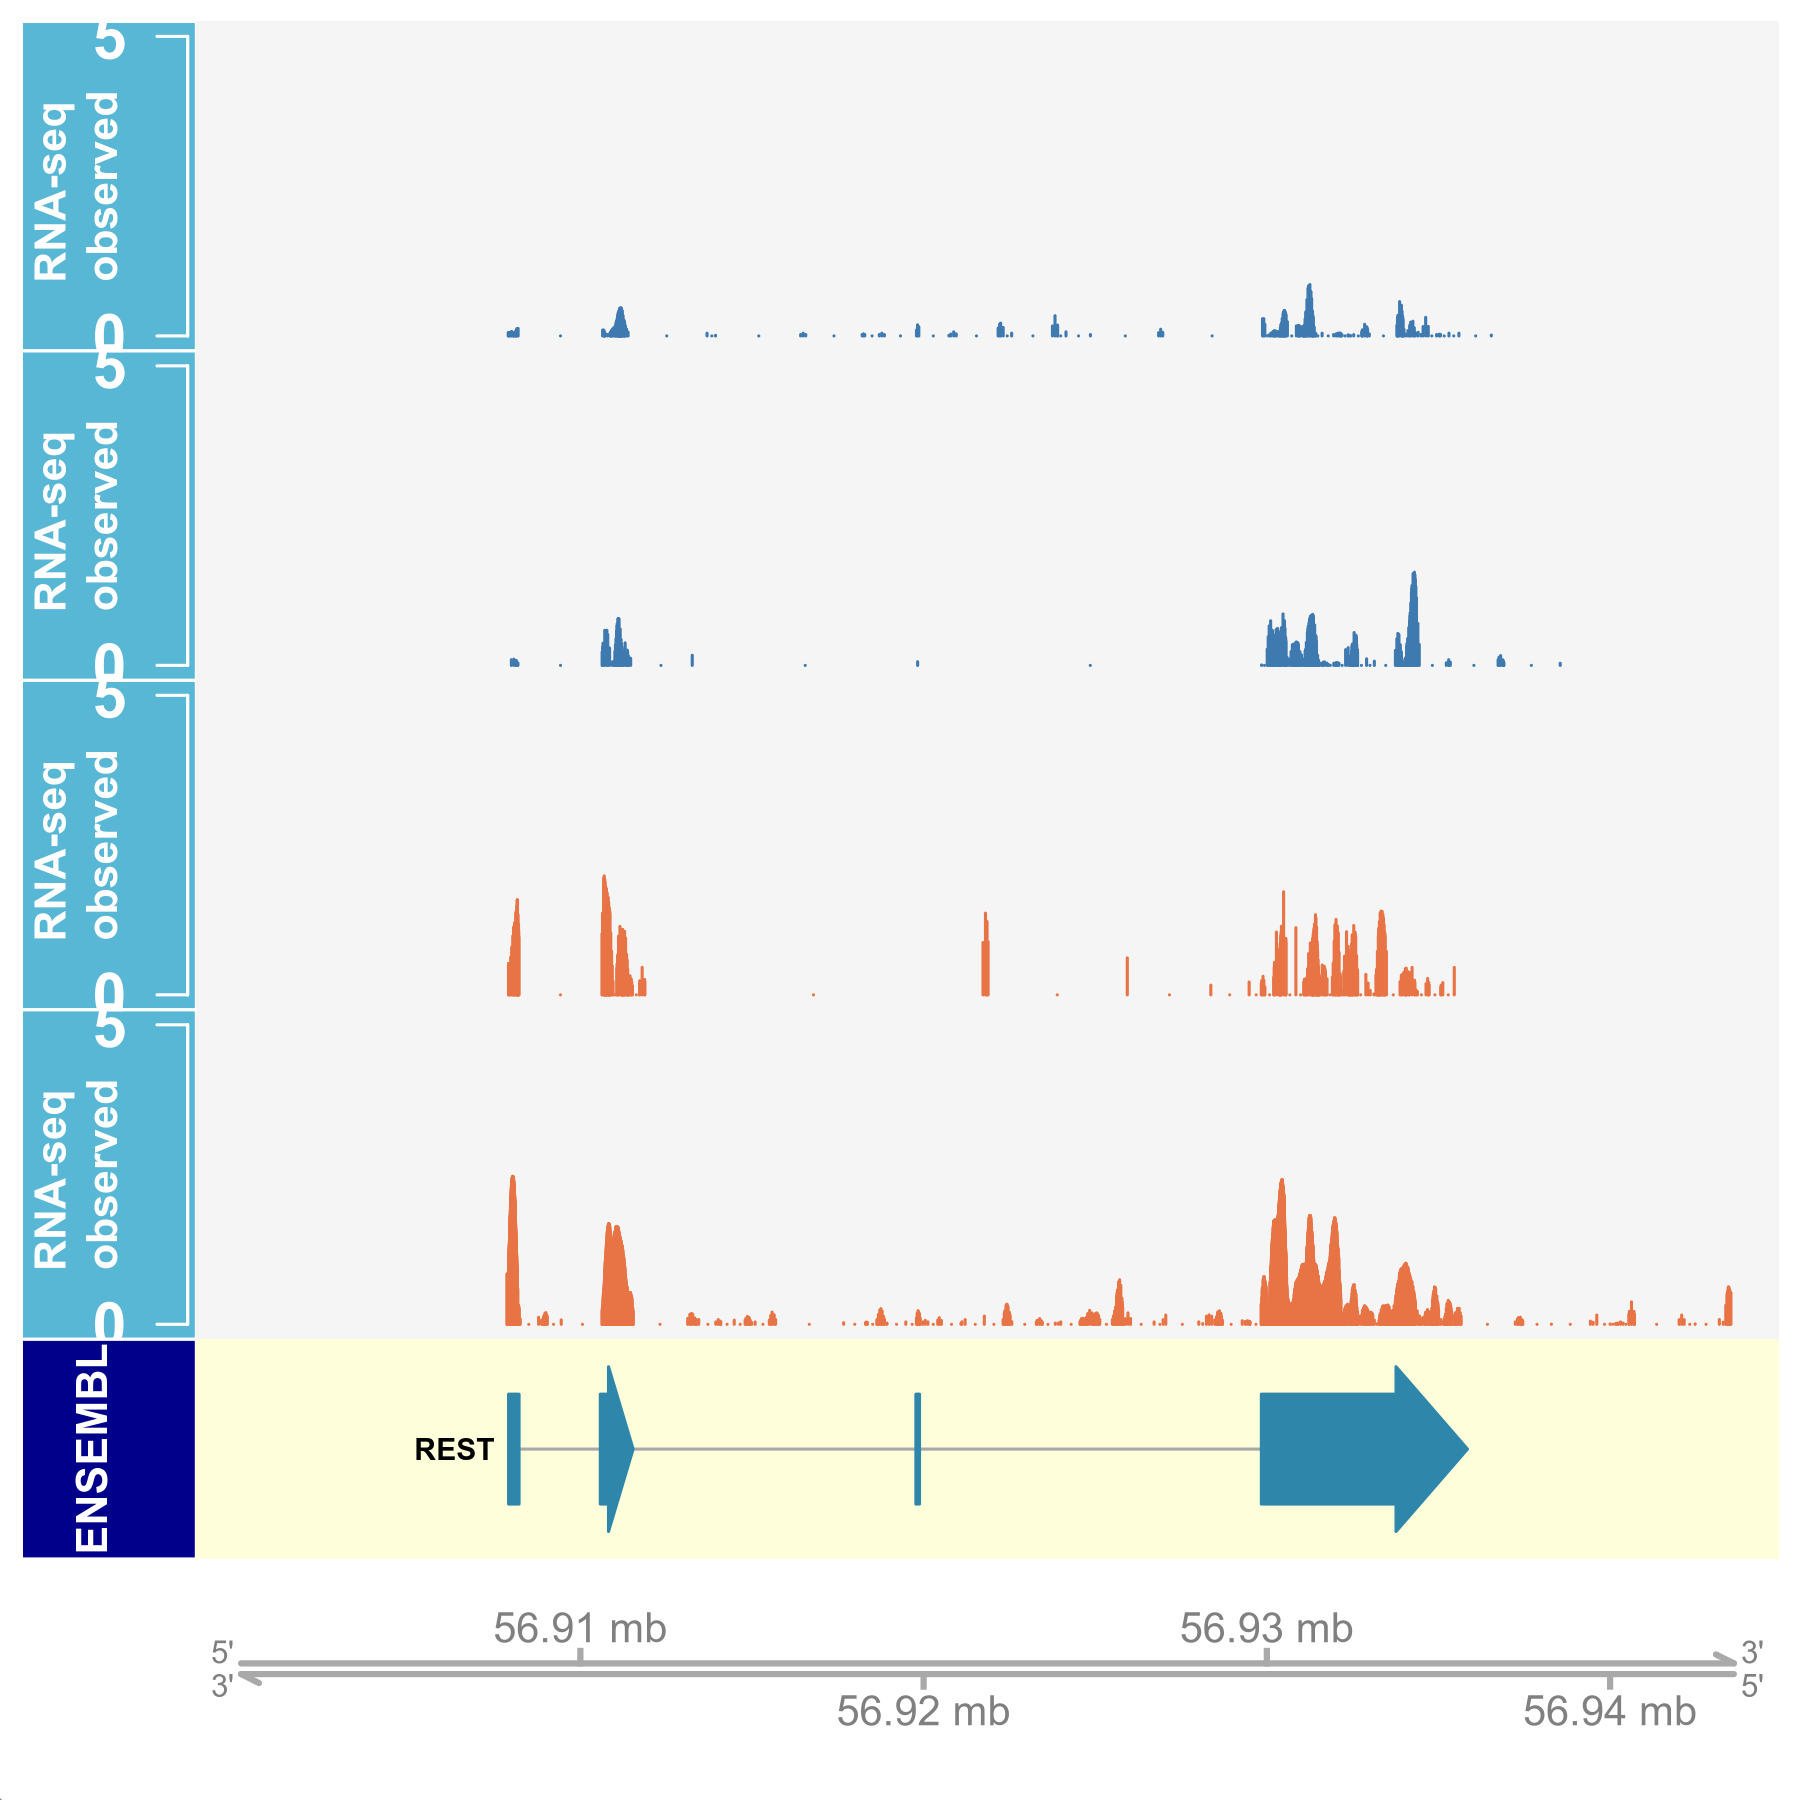

In [11]:
options(repr.plot.width=6, repr.plot.height=6, repr.plot.res = 300)
zoom <- 20000

full_tracks <- c(obs_tracks, grtrack, axis_track)
sizes <- rep(x=0.15, times=length(pred_tracks))
sizes <- c(sizes,  0.1, 0.1)
plotTracks(
    full_tracks,
    sizes = sizes,
    from = start + zoom / 2,
    to = end - zoom / 2,
    main = "",
    cex.main = 1.5,
    fontface.main = 2,
    window = -1,
    windowSize = 100
)